In [1]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools.dataloader import *
from dlstools import *
from matplotlib.pyplot import *
from dlstools.quickfit import *
from dlstools.dirty_fit import fit
%matplotlib inline
p='/dls/i16/data/2018/cm19668-4/%i.nxs'

=== Importing dlstools package


/dls_sw/apps/scisoftpy/2.7/scisoftpy/_external/tifffile.py:284: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "
Could not import plotting routines
No module named py4j.java_gateway


=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


In [2]:
a_si=5.43053
energy=7.11
#energy=8
theta=np.arcsin(6.2/(a_si/np.sqrt(27)*energy))
print 'th=', theta*180/np.pi

th= 56.55090888284691


/dls_sw/i16/software/python/dlstools/dataloader.py:47: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  setattr(self,'nx',_nx)


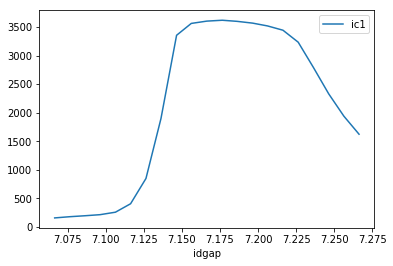

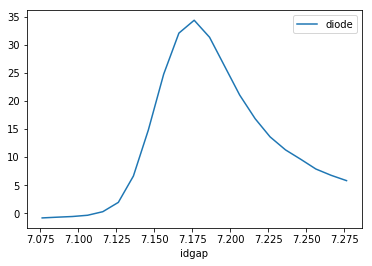

In [3]:
n=pdnx(p % 712778)
n.plot(x='idgap', y='ic1')
n=pdnx(p % 712779)
n.plot(x='idgap', y='diode')
#3.5 keV ic1 seems to saturate even with low gain ???


Text(0.5,1,u'/dls/i16/data/2018/cm19668-4/712784.nxs\nscan energy 3.2 2.4 0.1 Waittime 1 ic1')

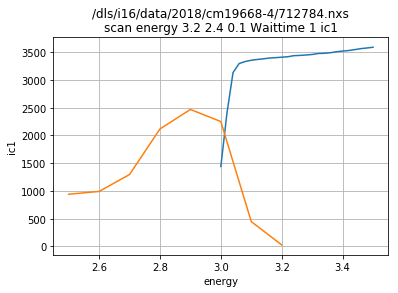

In [4]:
n=pdnx(p % 712780)
figure()
plot(n.DCMenergy, n.ic1monitor)
n=pdnx(p % 712784)
plot(n.DCMenergy, n.ic1monitor)
grid(1)
xlabel('energy'); ylabel('ic1')
title(n.scan)


Text(0.5,1,u'/dls/i16/data/2018/cm19668-4/712785.nxs\nscan idgap 6 7 0.01 Waittime 0.5 diode')

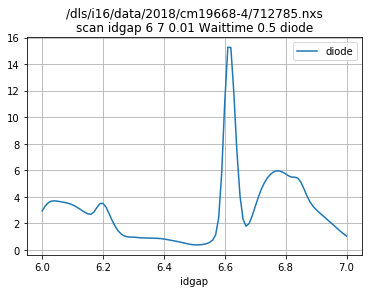

In [5]:
n=pdnx(p % 712785)
n.plot(x='idgap', y='diode')
grid(1)
title(n.scan)


In [6]:
a_yig = 12.376
d=a_yig/8
e=7.11
th=np.arcsin(6.2/d/e)
print 180/np.pi * 2 * th

68.6212033636


In [7]:
a_HoIG = 12.38
d=a_HoIG/16
e=8.071 #Ho L3
th=np.arcsin(6.2/d/e)
print 180/np.pi * 2 * th

166.244930233


Function name: Pseudo-Voigt + const
      area:            62448 +/- 17291     
    centre:         31.51480 +/- 0.00007   
     width:          0.00473 +/- 0.00017   
     lfrac:             -0.5 +/- 0.4       
  constant:          1459129 +/- 575143    



/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/matplotlib/pyplot.py:3259: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


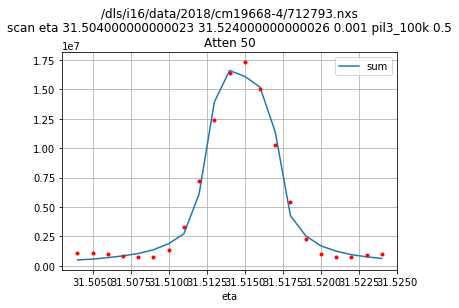

In [8]:
n=pdnx(p % 712793)
n.plot(x='eta', y='sum')
grid(1)
title(n.scan+'\nAtten 50')
fit(pv_c)

Function name: Pseudo-Voigt + const
      area:            62448 +/- 17291     
    centre:         31.51480 +/- 0.00007   
     width:          0.00473 +/- 0.00017   
     lfrac:             -0.5 +/- 0.4       
  constant:          1459129 +/- 575143    



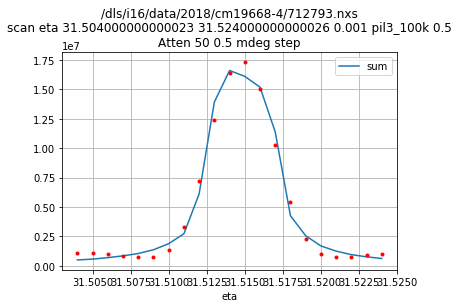

In [9]:
n=pdnx(p % 712793)
n.plot(x='eta', y='sum')
grid(1)
title(n.scan+'\nAtten 50 0.5 mdeg step')
fit(pv_c)

Function name: Pseudo-Voigt + const
      area:            12411 +/- 1316      
    centre:        31.513863 +/- 0.000021  
     width:          0.00220 +/- 0.00006   
     lfrac:             0.23 +/- 0.19      
  constant:           226804 +/- 92961     



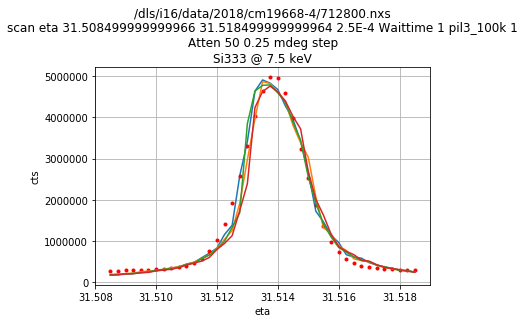

In [10]:
n=pdnx(p % 712800)
plot(n.eta, n['sum'])
grid(1)
xlabel('eta'); ylabel('cts')
title(n.scan+'\nAtten 50 0.25 mdeg step\nSi333 @ 7.5 keV')
fit(pv_c)
n=pdnx(p % 712801)
plot(n.eta, n['sum'])
n=pdnx(p % 712802)
plot(n.eta, n['sum'])
n=pdnx(p % 712803)
plot(n.eta, n['sum'])




## summary
Si 333 mono at 7.5 keV, 0.1 mm v slit, mirrors in

can see asymmetric shape

need bragg = 56.55 for 7.11 keV (current limit -54)

game on!


In [11]:
find_key(n.nx,'base_y')

.entry1.before_scan.positions.base_y


In [12]:
n.nx.entry1.before_scan.positions.base_y


NXfield(10.6175)

In [13]:
n

,Time,TimeFromEpoch,TimeSec,count_time,delta_axis_offset,eta,ic1monitor,kap,kdelta,kgam,kmu,kphi,kth,maxval,maxx,maxy,path,rc,sum
0,2.094473,1.537468e+09,268332.029435,1.0,8.8,31.50850,29.612384,-135.154465,64.6,0.0,0.0,57.301711,88.810211,23968.0,242.0,94.0,1.0,299.111206,166679.0
1,2.095405,1.537468e+09,268334.935362,1.0,8.8,31.50875,25.948746,-135.154465,64.6,0.0,0.0,57.301711,88.810461,25560.0,242.0,94.0,2.0,299.091339,173128.0
2,2.094740,1.537468e+09,268337.454078,1.0,8.8,31.50900,29.917532,-135.154465,64.6,0.0,0.0,57.301711,88.810711,29803.0,242.0,94.0,3.0,299.074310,194315.0
3,2.097914,1.537468e+09,268340.340765,1.0,8.8,31.50925,29.612384,-135.154465,64.6,0.0,0.0,57.301711,88.810961,31094.0,242.0,94.0,4.0,299.049286,201250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2.093443,1.537468e+09,268432.612874,1.0,8.8,31.51775,34.497079,-135.154465,64.6,0.0,0.0,57.301711,88.819461,74700.0,242.0,94.0,38.0,298.381287,324344.0
38,2.093257,1.537468e+09,268435.109076,1.0,8.8,31.51800,27.475417,-135.154465,64.6,0.0,0.0,57.301711,88.819711,68411.0,242.0,94.0,39.0,298.365814,297975.0
39,2.103945,1.537468e+09,268437.972311,1.0,8.8,31.51825,31.749350,-135.154465,64.6,0.0,0.0,57.301711,88.819961,59992.0,242.0,94.0,40.0,298.346130,265548.0
40,2.099165,1.537468e+09,268440.478869,1.0,8.8,31.51850,24.727689,-135.154465,64.6,0.0,0.0,57.301711,88.820211,53857.0,242.0,94.0,41.0,298.328735,240366.0


In [17]:
print n.nx.tree

root:NXroot
  entry1:NXentry
    before_scan:NXcollection
      beamline_slits:NXcollection
        s1xcentre = -0.002
        s1xgap = 2.498
        s1ycentre = 0.0015
        s1ygap = 0.999
        s2xcentre = -2.49999999999e-05
        s2xgap = 20.0015
        s2ycentre = 3.20175
        s2ygap = 0.0995
        s3xcentre = 4.458
        s3xgap = 24.998
        s3ycentre = -0.69
        s3ygap = 20.091
        s4xcentre = -6.01275
        s4xgap = 31.9469
        s4ycentre = -0.115
        s4ygap = 25.213
        shtr3x = 11.925
        shtr3y = 4.24
      delta_offset:NXcollection
        delta_offset = 0.0
      dettrans:NXcollection
        dettrans = 0.0
      diffractometer_sample:NXcollection
        azih = 1.0
        azik = 0.0
        azil = 0.0
        beta = -38.6925396027
        chi = 90.1655011361
        delta = 64.6
        delta_axis_offset = 8.8
        en = 2.4999999571
        eta = 31.5087495299
        gam = 0.0
        h = 0.026522575666
        k = -0.01250704

In [18]:
n.scan

u'/dls/i16/data/2018/cm19668-4/712803.nxs\nscan eta 31.508499999999966 31.518499999999964 2.5E-4 Waittime 1 pil3_100k 1'